In [1]:
import math 
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as stats

## Step 1: Generating mandelbrot set

In [2]:
def mandelbrot(dx , nmax , xbounds=(-2.25 , 1), ybounds= (-1.5,1.5)):
    x1, x2 = xbounds
    y1, y2 = ybounds
    xs = np.arange(x1, x2 + dx, dx)
    ys = np.arange(y1, y2 + dx, dx)
    coordinates = [(x,y) for x in xs for y in ys]
    mandelbrot = []
  
    for coordinate in coordinates:
        c = complex(coordinate[0], coordinate[1])
        zn_1 = 0
        height = 0
        
        for iteration in range(nmax):
            height += 1
            zn  = (zn_1**2) + c
            if abs(zn) > 2:
                break
            zn_1 = zn
        term = (c.real, c.imag , height) 
        mandelbrot.append(term)

    return np.array(mandelbrot)

    

 #### Visualizing

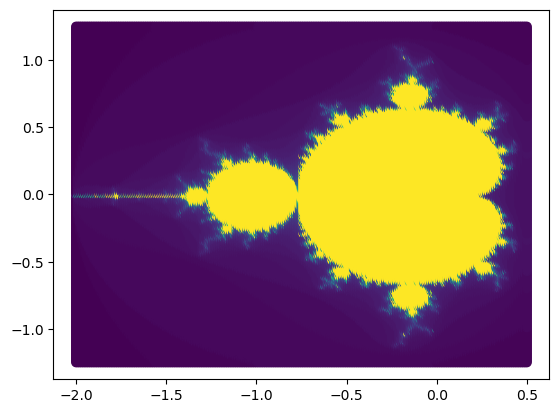

In [3]:

dx = 0.01
xrange = (-2, 0.5)
yrange = (-1.25,1.25)
nmax = 100


#sety = mandelbrot( dx=dx ,nmax = nmax)
sety = mandelbrot(dx ,nmax, xrange, yrange)

x, y , c = sety[:, 0], sety[:, 1], sety[:,2]


plt.scatter(x,y, c=c)


In [4]:
def MonteCarlo(iterations, sample, xlen, ylen):
    Data = mandelbrot(dx ,iterations, xrange, yrange)
    counter = 0
    Random_Point = random.choices(list(Data[:,2]), k = sample) # changed it to choices since we are considering uniform
        # distribution meaning every point is equally likely to be pulled. If we take random.sample it implies the likelihood
        # of the points being chosen increases after each iteration (I think at least). For not specified weights, this 
        # function chooses each number with equal probability --> uniformly distributed
    for s in range(sample):
        if Random_Point[s] >= iterations:
            counter = counter + 1
    A_m = (counter / sample) * ((xlen[1]-xlen[0]) * (ylen[1]-ylen[0]))
    return A_m

Area = MonteCarlo(1000, 10000, xrange, yrange)
print(Area)


1.51625


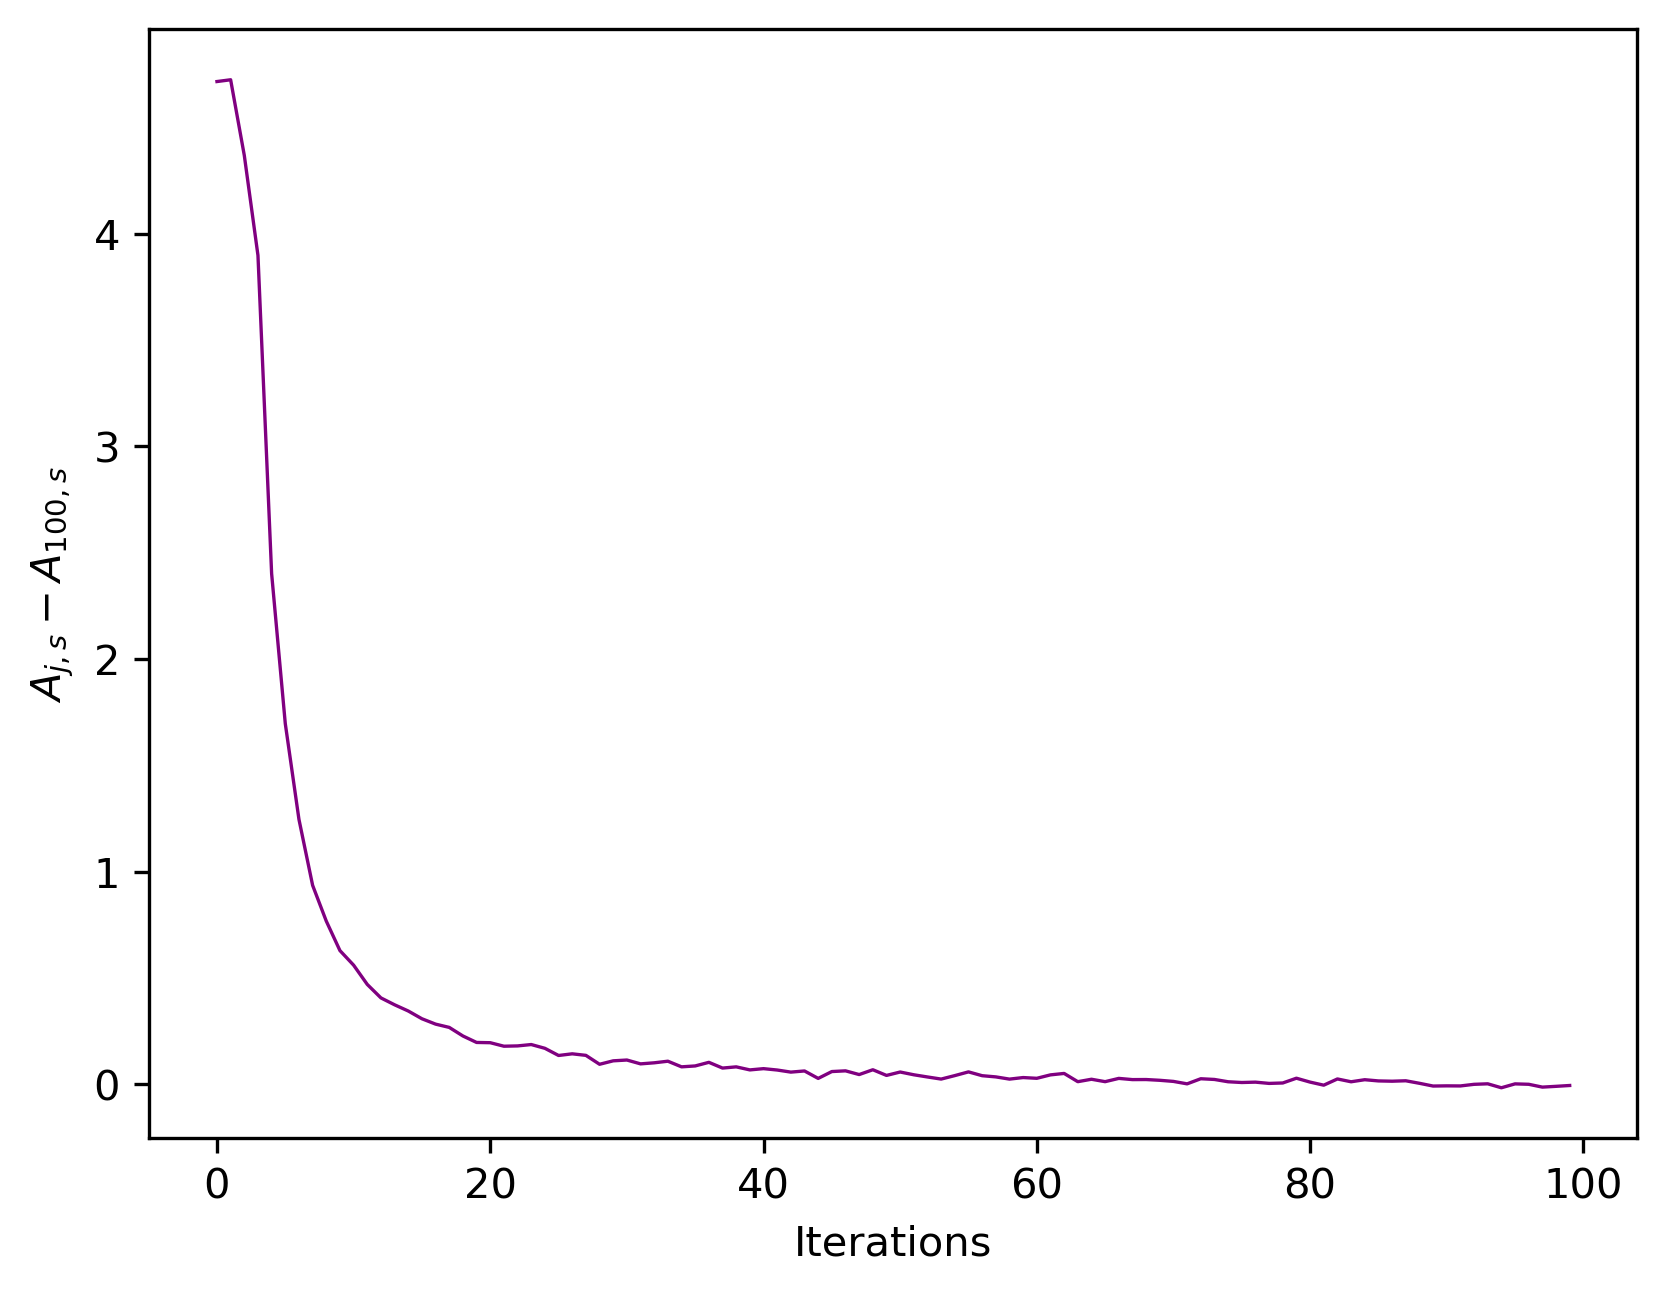

In [5]:
sample_size = 100000
iteration_max = 100
Res = np.empty((iteration_max, 1))

def Convergence(iteration_max, sample_size, xrange, yrange):
    Res = np.empty((iteration_max, 1))
    for i in range(iteration_max):
        Data_final = MonteCarlo(iteration_max, sample_size, xrange, yrange)
        Integral_var = MonteCarlo(i, sample_size, xrange, yrange)
        Res[i] = Integral_var - Data_final
    return Res

Result = Convergence(iteration_max, sample_size, xrange, yrange)
plt.figure(dpi=300)
plt.plot(Result, color = 'purple', linewidth = '0.8')
plt.xlabel('Iterations')
plt.ylabel(r'$A_{j,s}-A_{100,s}$')
plt.show()
plt.close()



In [5]:
#Latin hypercube sampling
    
def intervals(arr): #Returns a list of tuples for each interval of a list

    intervals = [] # A list of tuples containing each interval for the given range      
    for i in range(len(arr)):
        j = i +1
        if(j < len(arr)):
            interval = (arr[i],arr[j])
            intervals.append(interval)

    return intervals  

      
def shuffler(x,y): #Shuffles the position of the x and y intervals in their respective lists
 
      
      shuffled_x_intervals = random.sample(x, len(x))
      shuffled_y_intervals = random.sample(y, len(y))

      return[shuffled_x_intervals,shuffled_y_intervals]


def latin_hypercube_sample(n): #Returns a list of randomly sampled n complex numbers from each row of the grid


        xrange = np.linspace(-2,0.5,n+1) #x range in grid, with step n+1
    
        yrange = np.linspace(-1.25,1.25,n+1) #y range in grid, with step n+1

        x_intervals_list = intervals(xrange) #A list in which each element is one of the intervals in the x range

        y_intervals_list = intervals(yrange) #A list in which each element is one of the intervals in the y range
        
        #print("X INTERVALS")
        #print(x_intervals_list)
        ##print("Y INTERVALS")
        #print(y_intervals_list)
        
        shuffled_x_intervals, shuffled_y_intervals  = shuffler(x_intervals_list,y_intervals_list) #Shuffling the intervals of both lists
        
        random_x_list = [] #A list of random numbers chosen uniformly from each interval of the shuffled x intervals
        random_y_list = [] #A list of random numbers chosen uniformly from each interval of the shuffled y intervals

        for interval in shuffled_x_intervals:
                
                random_x = random.uniform(interval[0],interval[1])
                random_x_list.append(random_x)


        for interval in shuffled_y_intervals:

                random_y = random.uniform(interval[0],interval[1])
                random_y_list.append(random_y)

        
        coordinates = list(zip(random_x_list, random_y_list))  
        

        random_complex_numbers = []

        for coordinate in coordinates:
                c = complex(coordinate[0], coordinate[1])
                random_complex_numbers.append(c)


        return[random_complex_numbers]



In [7]:

#GET HEIGHTS FOR LATIN HYPERCUBE SAMPLE
latin_list = latin_hypercube_sample(1000)
#print(len(mandelbrot_dictionary))
#print(mandelbrot_dictionary['(-2-1.25j)'])

heights = []

for number in latin_list[0]:
        c = number
        zn_1 = 0
        height = 0
        
        for iteration in range(nmax):
            height += 1
            zn  = (zn_1**2) + c
            if abs(zn) > 2:
                break
            zn_1 = zn
        heights.append(height)
        


In [8]:
#Calculate new Area with latin hypercube sampling
counter = 0
for height in heights:
    Random_Point = height
    if Random_Point >= 100:
            counter = counter + 1
A_m = (counter / len(heights)) * (2.5) * 2.5
print(A_m)
#Area = MonteCarlo(1000, 10000, xrange, yrange)
#print(Area)


1.525


In [6]:
#Orthogonal sampling

def orthogonal_shuffler(x,y,n): #Shuffles the position of the x and y intervals in a quadrant
      
            
            shuffled_x_intervals = random.sample(x, n) #We only draw n intervals, where n is the number of values we want to pick from each quadrant
            shuffled_y_intervals = random.sample(y, n)

            return[shuffled_x_intervals,shuffled_y_intervals]

def orthogonal_sampling(n):

      samples_per_quadrant = int(n/4) #Working out the nunber of samples per quadrant 

      xrange = np.linspace(-2,0.5,n+1) #x range in grid, with step n+1
      
      yrange = np.linspace(-1.25,1.25,n+1) #y range in grid, with step n+1

      x_intervals_list = intervals(xrange) #A list in which each element is one of the intervals in the x range

      y_intervals_list = intervals(yrange)#A list in which each element is one of the intervals in the y range

      midpoint = int(len(x_intervals_list)/2) #Both x and y lists have the same length, and hence the same mid point
      x_halves = [[x_intervals_list[:midpoint]],[x_intervals_list[midpoint:]]] #slicing the x intervals in half
      y_halves = [[y_intervals_list[:midpoint]],[y_intervals_list[midpoint:]]] #Slicing the y intervals in half

      quadrant1 = [x_halves[0],y_halves[0]] #Bottom left square
      quadrant2 = [x_halves[0],y_halves[1]] #Top left square
      quadrant3 = [x_halves[1],y_halves[0]] #Bottom right square
      quadrant4 = [x_halves[1],y_halves[1]] #Top right square

      quadrants = [quadrant1,quadrant2,quadrant3,quadrant4]

      orthogonal_sample = [] #Stores all the complex numbers for the Orthogonal sample
      x_interval_bin = [] #A list that stores previously used x intervals so that values in these intervals can't be selected in other quadrants
      y_interval_bin = [] #A list that stores previously used y intervals so that values in these intervals can't be selected in other quadrants



      for quadrant in quadrants:
      
            x_intervals = quadrant[0][0] #Extracting the x intervals of this quadrant
            y_intervals = quadrant[1][0] #Extracting the y intervals of this quadrant

            x_intervals = [x for x in x_intervals if x not in x_interval_bin]
            y_intervals = [y for y in y_intervals if y not in y_interval_bin]    
                        
            #print(x_intervals)
            shuffled_x_intervals, shuffled_y_intervals  = orthogonal_shuffler(x_intervals,y_intervals,samples_per_quadrant) #Shuffling the x and y intervals of this quadrant 
            random_x_list = []
            random_y_list = []

            #print(shuffled_x_intervals)
            

            for interval in shuffled_x_intervals:
                  
                        x_interval_bin.append(interval) #Add these x intervals to the bin, we don't want to use them again

                        random_x = random.uniform(interval[0],interval[1])
                        random_x_list.append(random_x)

            for interval in shuffled_y_intervals:

                        y_interval_bin.append(interval) #Add these y intervals to the bin, we don't want to use them again
                        random_y = random.uniform(interval[0],interval[1])
                        random_y_list.append(random_y)

            #print("x BIN")
            #print(x_interval_bin)
            #print("y bin")
            #print(y_interval_bin)
            coordinates = list(zip(random_x_list, random_y_list))  
                  

            for coordinate in coordinates:
                        c = complex(coordinate[0], coordinate[1])
                        orthogonal_sample.append(c)
                        
      return [orthogonal_sample]


In [10]:
##GET HEIGHTS FOR ORTHOGONAL SAMPLE

orthogonal_sample = orthogonal_sampling(1000)

orthogonal_heights = []

for number in orthogonal_sample[0]:
        c = number
        zn_1 = 0
        orthogonal_height = 0
        
        for iteration in range(nmax):
            orthogonal_height += 1
            zn  = (zn_1**2) + c
            if abs(zn) > 2:
                break
            zn_1 = zn
        orthogonal_heights.append(orthogonal_height)
        

In [11]:
#Calculate new Area with orthogonal sample
counter = 0
for height in orthogonal_heights:
    Random_Point = height
    if Random_Point >= 100:
            counter = counter + 1
A_m = (counter / len(orthogonal_heights)) * (2.5) * 2.5
print(A_m)
#Area = MonteCarlo(1000, 10000, xrange, yrange)
#print(Area)

1.5562500000000001


In [7]:
#METHODS REQUIRED TO GENERATE MULTIPLE AREA ESTIMATES

def calculate_heights(complex_numbers):
    
    heights = []

    for number in complex_numbers:
        c = number
        zn_1 = 0
        height = 0
        
        for iteration in range(nmax):
            height += 1
            zn  = (zn_1**2) + c
            if abs(zn) > 2:
                break
            zn_1 = zn
        heights.append(height)
        
    return heights
        
    
def calculate_area(heights):

    counter = 0
    for height in heights:
        Random_Point = height
        if Random_Point >= 100:
            counter = counter + 1
    A_m = (counter / len(heights)) * (2.5) * 2.5

    return A_m

    



In [39]:
#Generate multiple areas using latin sampling

areas_latin = []

for i in range(100):

    latin_list = latin_hypercube_sample(1000)

    heights = calculate_heights(latin_list[0])

    area = calculate_area(heights)

    areas_latin.append(area)

print(areas_latin)

[1.6562500000000002, 1.5, 1.6562500000000002, 1.66875, 1.525, 1.5875, 1.50625, 1.5812500000000003, 1.575, 1.4687499999999998, 1.525, 1.575, 1.5562500000000001, 1.525, 1.525, 1.4812500000000002, 1.4687499999999998, 1.61875, 1.43125, 1.55, 1.41875, 1.53125, 1.5625, 1.5125, 1.41875, 1.53125, 1.5375, 1.5687499999999999, 1.6125, 1.5437499999999997, 1.5875, 1.49375, 1.55, 1.53125, 1.4500000000000002, 1.5125, 1.5375, 1.5625, 1.5687499999999999, 1.5437499999999997, 1.4250000000000003, 1.63125, 1.6062500000000002, 1.53125, 1.5125, 1.6062500000000002, 1.59375, 1.5812500000000003, 1.5625, 1.625, 1.4375000000000002, 1.49375, 1.525, 1.5375, 1.4500000000000002, 1.525, 1.5, 1.6375000000000002, 1.49375, 1.49375, 1.59375, 1.53125, 1.5375, 1.5375, 1.5562500000000001, 1.4874999999999998, 1.55, 1.5437499999999997, 1.4874999999999998, 1.4687499999999998, 1.5437499999999997, 1.575, 1.5375, 1.5437499999999997, 1.675, 1.53125, 1.5875, 1.53125, 1.6375000000000002, 1.5125, 1.4500000000000002, 1.49375, 1.5, 1.6,

In [38]:
#Generate multiple areas using orthogonal sampling

areas_orthogonal = []

for i in range(100):

    orthogonal_list = orthogonal_sampling(1000)

    heights = calculate_heights(orthogonal_list[0])

    area = calculate_area(heights)

    areas_orthogonal.append(area)

print(areas_orthogonal)

[1.5437499999999997, 1.5625, 1.53125, 1.5625, 1.53125, 1.55, 1.66875, 1.50625, 1.5437499999999997, 1.53125, 1.5687499999999999, 1.6062500000000002, 1.5875, 1.5437499999999997, 1.625, 1.4874999999999998, 1.5812500000000003, 1.4625000000000001, 1.5437499999999997, 1.5437499999999997, 1.61875, 1.5875, 1.53125, 1.55, 1.5562500000000001, 1.5687499999999999, 1.53125, 1.5125, 1.5687499999999999, 1.5812500000000003, 1.5, 1.59375, 1.5437499999999997, 1.55, 1.53125, 1.5125, 1.6062500000000002, 1.6, 1.4874999999999998, 1.6, 1.53125, 1.5375, 1.53125, 1.5437499999999997, 1.5562500000000001, 1.50625, 1.55, 1.5875, 1.5375, 1.5375, 1.5687499999999999, 1.63125, 1.6, 1.6, 1.5187499999999998, 1.4874999999999998, 1.4874999999999998, 1.55, 1.5875, 1.5375, 1.55, 1.6062500000000002, 1.625, 1.53125, 1.63125, 1.5437499999999997, 1.4687499999999998, 1.5437499999999997, 1.5375, 1.5437499999999997, 1.5375, 1.6, 1.49375, 1.6500000000000001, 1.53125, 1.6, 1.6125, 1.5375, 1.5187499999999998, 1.59375, 1.5562500000000

In [31]:
#Generate multiple areas using pure random sampling 

data_set = mandelbrot(0.01, 10000, xrange, yrange)

def pure_sampling(data, iterations, sample, xlen, ylen):
    counter = 0
    Random_Point = random.choices(list(data[:,2]), k = sample) # changed it to choices since we are considering uniform
        # distribution meaning every point is equally likely to be pulled. If we take random.sample it implies the likelihood
        # of the points being chosen increases after each iteration (I think at least). For not specified weights, this 
        # function chooses each number with equal probability --> uniformly distributed
    for s in range(sample):
        if Random_Point[s] >= iterations:
            counter = counter + 1
    A_m = (counter / sample) * ((xlen[1]-xlen[0]) * (ylen[1]-ylen[0]))
    return A_m


In [37]:
areas_pure = []

for i in range(100):
    area = pure_sampling(data_set,1000, 1000, xrange, yrange)
    areas_pure.append(area)

print(areas_pure)


[1.5375, 1.34375, 1.46875, 1.6, 1.3625, 1.34375, 1.5875, 1.3625, 1.4749999999999999, 1.69375, 1.45625, 1.49375, 1.48125, 1.525, 1.41875, 1.56875, 1.3375, 1.4000000000000001, 1.55, 1.4874999999999998, 1.5875, 1.36875, 1.46875, 1.4312500000000001, 1.5125, 1.44375, 1.38125, 1.4749999999999999, 1.46875, 1.60625, 1.5375, 1.40625, 1.4500000000000002, 1.5062499999999999, 1.4749999999999999, 1.3875, 1.4874999999999998, 1.3875, 1.54375, 1.7500000000000002, 1.5625, 1.53125, 1.425, 1.46875, 1.675, 1.4375, 1.51875, 1.6125, 1.51875, 1.6187500000000001, 1.625, 1.4749999999999999, 1.5375, 1.5, 1.58125, 1.55625, 1.4125, 1.6625, 1.4312500000000001, 1.625, 1.6125, 1.3375, 1.5125, 1.575, 1.6500000000000001, 1.5375, 1.28125, 1.4375, 1.4000000000000001, 1.56875, 1.55625, 1.5125, 1.51875, 1.2874999999999999, 1.5062499999999999, 1.4625000000000001, 1.5062499999999999, 1.44375, 1.625, 1.525, 1.55, 1.56875, 1.5062499999999999, 1.4874999999999998, 1.675, 1.5, 1.60625, 1.6, 1.6625, 1.35, 1.6375000000000002, 1.70

In [34]:
#Confidence intervals

def confidence_intervals(data):
    
    mean = np.mean(data)
    std = np.std(data, ddof= 1)

    #Sample size
    n = len(data)

    confidence_level = 0.95
    significance_level = 1 - confidence_level
    z = stats.norm.ppf(1-significance_level/2)

    margin_of_error = z * (std/np.sqrt(n))

    confidence_interval = [mean - margin_of_error, mean + margin_of_error]

    return confidence_interval



Pure SAMPLING CI
[1.4879487186876141, 1.5255512813123855]
LATIN SAMPLING CI
[1.533314808708525, 1.556435191291474]
ORTHOGONAL SAMPLING CI
[1.5457628451262349, 1.563112154873765]


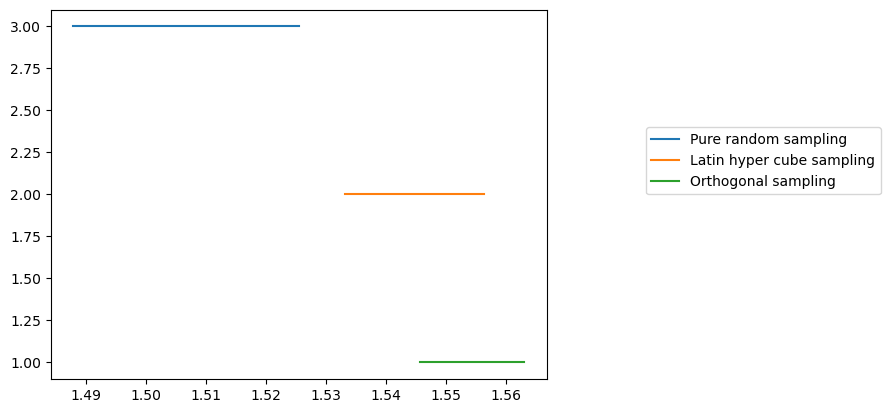

In [46]:
#Confidence intervals

print("Pure SAMPLING CI")
confidence_interval_pure = confidence_intervals(areas_pure)
print(confidence_interval_pure)

print("LATIN SAMPLING CI")
confidence_interval_latin = confidence_intervals(areas_latin)
print(confidence_interval_latin)

print("ORTHOGONAL SAMPLING CI")
confidence_interval_orthogonal = confidence_intervals(areas_orthogonal)
print(confidence_interval_orthogonal)

plt.plot(confidence_interval_pure,[3,3], label = "Pure random sampling")
plt.plot(confidence_interval_latin,[2,2], label = "Latin hyper cube sampling")
plt.plot(confidence_interval_orthogonal,[1,1], label = "Orthogonal sampling")

plt.legend(loc=(1.2, 0.5))
